In [257]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier as RF

In [258]:
path = 'pokemon_alopez247.csv'
df = pd.read_csv(path)

In [259]:
type = LabelEncoder()
df['Type_1'] = type.fit_transform(df['Type_1'].astype('str'))
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,9,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,9,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,9,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,6,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,6,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [260]:
#X = df.drop(columns=['Number', 'Name', 'Type_1', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 
                   #  'Egg_Group_2', 'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'])
#Y = df['isLegendary']

In [261]:
X = df.drop(columns=['Number', 'Name', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 
                     'Egg_Group_2', 'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'])
Y = df['isLegendary']

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.3)

In [263]:
from sklearn.metrics import accuracy_score

#model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

clf_list = {'Logistic Regression': LogisticRegression(), 
            'Gaussian NB': GaussianNB(), 
            'KNN': KNeighborsClassifier(),
            'DT': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(n_estimators=200),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=200),
            'ADA': AdaBoostClassifier(n_estimators=200),
            'SVM': OneVsOneClassifier(LinearSVC())}

In [264]:
for name, clf in clf_list.items():
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('Accuracy of {}:'.format(name), accuracy_score(pred, y_test))
    print('')

C:\Users\space\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Logistic Regression: 0.9262672811059908

Accuracy of Gaussian NB: 0.9585253456221198

Accuracy of KNN: 0.9585253456221198

Accuracy of DT: 0.9769585253456221

Accuracy of Random Forest: 0.9769585253456221

Accuracy of Gradient Boosting: 0.9861751152073732

Accuracy of ADA: 0.9815668202764977

Accuracy of SVM: 0.9400921658986175



C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [265]:
labels = np.array(df['isLegendary'])

#df= df.drop(['Number', 'Name', 'Type_1', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 
 #            'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'], axis = 1)

df= df.drop(['Number', 'Name', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 
             'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'], axis = 1)    

feature_list = list(df.columns)

df = np.array(df)

RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)

estimator = RF.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree0.dot',
                feature_names = feature_list,
                filled=False, rounded=True, precision=2)

In [266]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree0.dot')
graph.write_png('tree0.png')

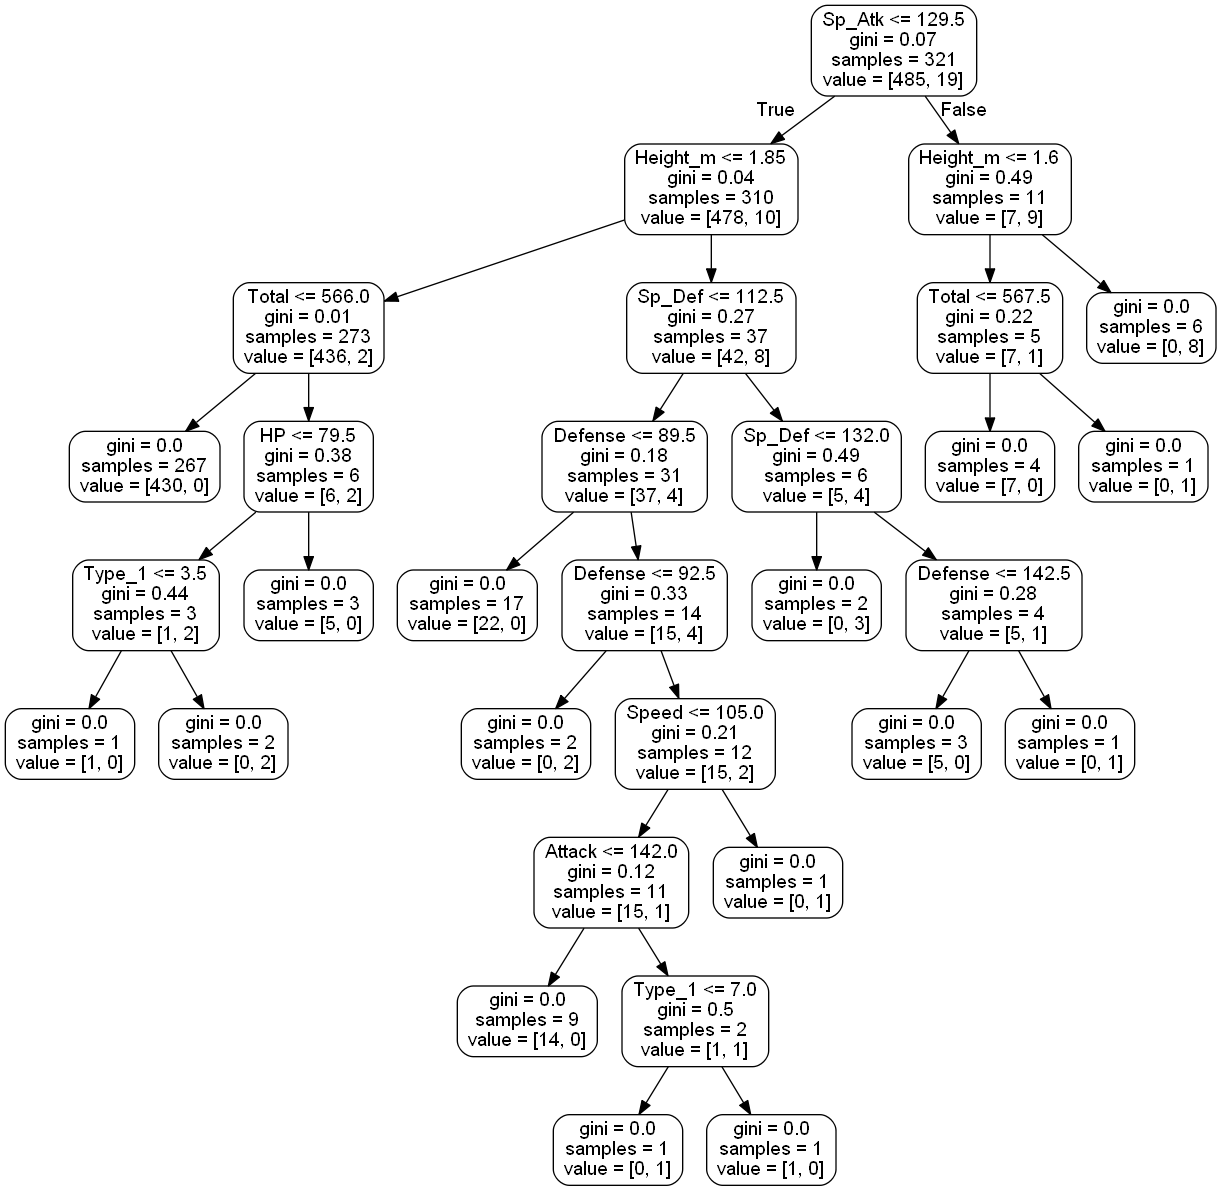

In [267]:
from IPython.display import Image
Image(filename = 'tree0.png')

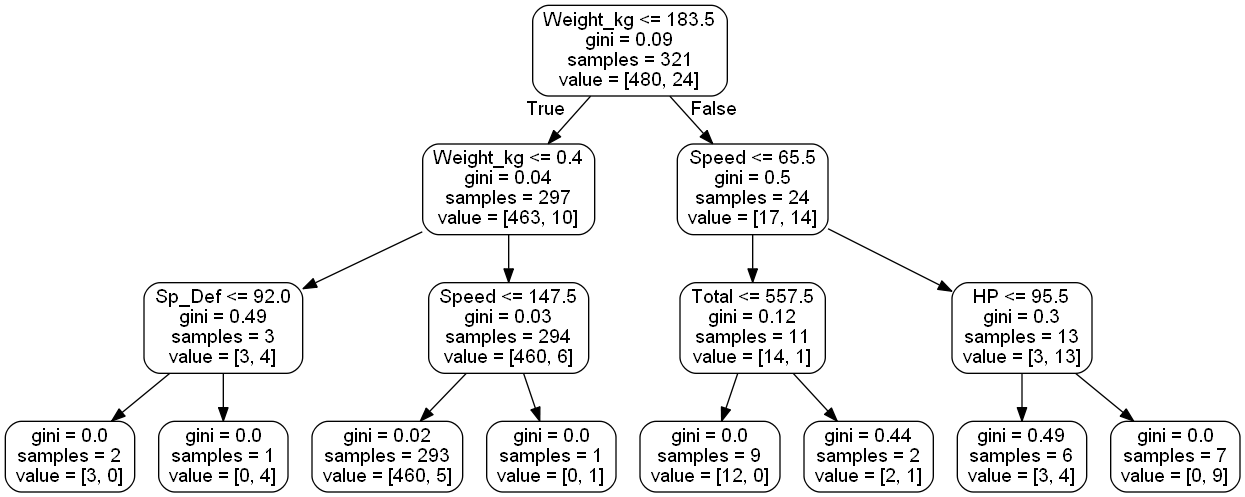

In [268]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree0.dot', 
                feature_names = feature_list, 
                filled=False, rounded = True, precision = 2)
(graph, ) = pydot.graph_from_dot_file('small_tree0.dot')
graph.write_png('small_tree0.png')

from IPython.display import Image
Image(filename = 'small_tree0.png')

In [269]:
feature_imp = pd.Series(RF.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Total        0.390119
Sp_Atk       0.192949
Height_m     0.095914
Speed        0.061535
Weight_kg    0.054778
Sp_Def       0.052316
Defense      0.049945
HP           0.041441
Attack       0.036845
Type_1       0.024157
dtype: float64

No handles with labels found to put in legend.


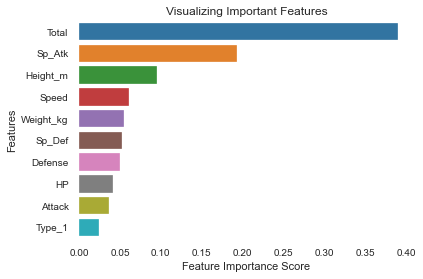

In [270]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [271]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
print(classification_report(y_train, RF.predict(X_train)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       474
        True       1.00      0.93      0.97        30

    accuracy                           1.00       504
   macro avg       1.00      0.97      0.98       504
weighted avg       1.00      1.00      1.00       504



In [272]:
# AdaBoost Classifier model
ADA = AdaBoostClassifier(DecisionTreeClassifier())
ADA.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [273]:
feature_imp = pd.Series(ADA.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Total        0.167911
Sp_Atk       0.111610
Defense      0.027142
Attack       0.021504
Speed        0.020496
Weight_kg    0.020186
Sp_Def       0.019103
Height_m     0.015572
HP           0.011699
Type_1       0.004777
dtype: float64

No handles with labels found to put in legend.


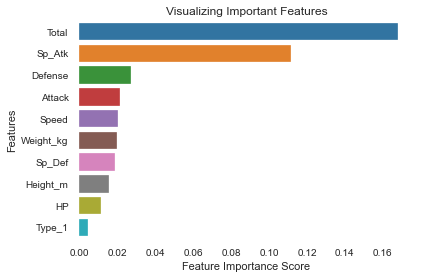

In [274]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()